## Confidence Intervals 
A confidence Interval is a range of values that likely would contain an unknown pooulation parameter.We can use only for aggregated about population,not for indiviual.


## Codifence level
refer to the percentage of probability,or certainly,that the confidence interval would contain the true population parameter when you draw a random smaple many times

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)

coffee_full = pd.read_csv('coffee_dataset.csv')
coffee_red = coffee_full.sample(200) #this is the only data you might actually get in the real world.

`1.` What is the proportion of coffee drinkers in the sample?  What is the proportion of individuals that don't drink coffee?

`1.` What is the proportion of coffee drinkers in the sample?  What is the proportion of individuals that don't drink coffee

In [11]:
 a = coffee_red['drinks_coffee'].value_counts()[1] / sum(coffee_red['drinks_coffee'].value_counts()[0:2]) ; a

0.595

In [12]:
1-a

0.405

`2.` Of the individuals who drink coffee, what is the average height? Of the individuals who do not drink coffee, what is the average height?

In [13]:
coffee_red.groupby(coffee_red['drinks_coffee'])['height'].mean()

drinks_coffee
False    66.784923
True     68.119630
Name: height, dtype: float64

`3.` Simulate 200 "new" individuals from your original sample of 200.  What are the proportion of coffee drinkers in your bootstrap sample?  How about individuals that don't drink coffee?

In [15]:
bootsamp = coffee_red.sample(200, replace = True)
bootsamp['drinks_coffee'].mean()

0.605

`4.` Now simulate your bootstrap sample 10,000 times and take the mean height of the non-coffee drinkers in each sample. Each bootstrap sample should be from the very first sample of 200 data points. Plot the distribution, and pull the values necessary for a 95% confidence interval.  What do you notice about the sampling distribution of the mean in this example?

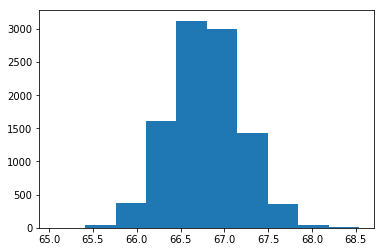

In [17]:
boot_means = []
for _ in range(10000):
    bootsamp = coffee_red.sample(200, replace = True)
    boot_mean = bootsamp[bootsamp['drinks_coffee'] == False]['height'].mean()
    boot_means.append(boot_mean)
    
plt.hist(boot_means); # Looks pretty normal

In [18]:
boot_means = np.array(boot_means)
boot_means.mean()

66.78945913306956

`5.`  Did your interval capture the actual average height of non-coffee drinkers in the population?  Look at the average in the population and the two bounds provided by your 95% confidence interval, and then answer the final quiz question below.

In [19]:
np.percentile(boot_means, 2.5), np.percentile(boot_means, 97.5) # confidence interval 

(66.00553304554545, 67.5973045839486)

# Confidence Interval - Difference In Means

Here you will look through the example for the last video, but you will also go a couple of steps further into what might actually be going on with this data.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(42)

full_data = pd.read_csv('coffee_dataset.csv')
sample_data = full_data.sample(200)

`1.` For 10,000 iterations, bootstrap sample your sample data, compute the difference in the average heights for coffee and non-coffee drinkers.  Build a 99% confidence interval using your sampling distribution.  Use your interval to start answering the first quiz question below.

In [22]:
diffs = []
for _ in range(10000):
    bootsamp = sample_data.sample(200, replace = True)
    coff_mean = bootsamp[bootsamp['drinks_coffee'] == True]['height'].mean()
    nocoff_mean = bootsamp[bootsamp['drinks_coffee'] == False]['height'].mean()
    diffs.append(coff_mean - nocoff_mean)
    
np.percentile(diffs, 0.5), np.percentile(diffs, 99.5) 
# statistical evidence coffee drinkers are on average taller (positive interval)

(0.10258900080921124, 2.538833370796657)

`2.` For 10,000 iterations, bootstrap sample your sample data, compute the difference in the average heights for those older than 21 and those younger than 21.  Build a 99% confidence interval using your sampling distribution.  Use your interval to finish answering the first quiz question below.  

In [23]:
diffs_age = []
for _ in range(10000):
    bootsamp = sample_data.sample(200, replace = True)
    under21_mean = bootsamp[bootsamp['age'] == '<21']['height'].mean()
    over21_mean = bootsamp[bootsamp['age'] != '<21']['height'].mean()
    diffs_age.append(over21_mean - under21_mean)
    
np.percentile(diffs_age, 0.5), np.percentile(diffs_age, 99.5)
# statistical evidence that over21 are on average taller

(3.3652749452554795, 5.0932450670661495)

`3.` For 10,000 iterations bootstrap your sample data, compute the difference in the average height for coffee drinkers and the average height non-coffee drinkers for individuals under 21 years old.  Using your sampling distribution, build a 95% confidence interval.  Use your interval to start answering question 2 below.

In [24]:
diffs_coff_under21 = []
for _ in range(10000):
    bootsamp = sample_data.sample(200, replace = True)
    under21_coff_mean = bootsamp.query("age == '<21' and drinks_coffee == True")['height'].mean()
    under21_nocoff_mean = bootsamp.query("age == '<21' and drinks_coffee == False")['height'].mean()
    diffs_coff_under21.append(under21_nocoff_mean - under21_coff_mean)
    
np.percentile(diffs_coff_under21, 2.5), np.percentile(diffs_coff_under21, 97.5)
# For the under21 group, we have evidence that the non-coffee drinkers are on average taller

(1.0593651244624267, 2.593155794067904)

If you got a negeative interval (under21_coff_mean - under21_nocoff_mean). It's correct result. **That implies that coffee drinkers are on average smaller than non-coffee drinkers**

`4.` For 10,000 iterations bootstrap your sample data, compute the difference in the average height for coffee drinkers and the average height non-coffee drinkers for individuals under 21 years old.  Using your sampling distribution, build a 95% confidence interval. Use your interval to finish answering the second quiz question below. As well as the following questions.

In [25]:
diffs_coff_over21 = []
for _ in range(10000):
    bootsamp = sample_data.sample(200, replace = True)
    over21_coff_mean = bootsamp.query("age != '<21' and drinks_coffee == True")['height'].mean()
    over21_nocoff_mean = bootsamp.query("age != '<21' and drinks_coffee == False")['height'].mean()
    diffs_coff_over21.append(over21_nocoff_mean - over21_coff_mean)
    
np.percentile(diffs_coff_over21, 2.5), np.percentile(diffs_coff_over21, 97.5)
# For the over21 group, we have evidence that on average the non-coffee drinkers are taller

(1.8278953970883667, 4.402632965477434)

### Conclusion (very important)
Within the under 21 and over 21 groups, we saw that on average non-coffee drinkers were taller.  But, when combined, we saw that on average coffee drinkers were on average taller.  This is again **Simpson's paradox**, and essentially there are more adults in the dataset who were coffee drinkers.  So these individuals made it seem like coffee drinkers were on average taller - which is a misleading result.  


https://www.britannica.com/topic/Simpsons-paradox here is more information about **Simpson's paradox**